In [1]:
import pandas as pd
import numpy as np

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

## Get numerica Data

In [3]:
data_train = data_train._get_numeric_data()
data_test = data_test._get_numeric_data()

## Filling data

In [4]:
data_train['LotFrontage'] = data_train['LotFrontage'].fillna(value = data_train['LotFrontage'].mean())
data_train['GarageYrBlt'] = data_train['GarageYrBlt'].fillna(value = 0)
data_train['MasVnrArea'] = data_train['MasVnrArea'].fillna(value = 0)

In [5]:
data_train.isnull().sum().sum()

0

In [6]:
data_test['LotFrontage'] = data_test['LotFrontage'].fillna(value = data_test['LotFrontage'].mean())
data_test['GarageYrBlt'] = data_test['GarageYrBlt'].fillna(value = 0)
data_test['MasVnrArea'] = data_test['MasVnrArea'].fillna(value = 0)

data_test['BsmtFinSF1'] = data_test['BsmtFinSF1'].fillna(value = data_test['BsmtFinSF1'].mean())
data_test['BsmtFinSF2'] = data_test['BsmtFinSF2'].fillna(value = data_test['BsmtFinSF2'].mean())
data_test['BsmtUnfSF'] = data_test['BsmtUnfSF'].fillna(value = data_test['BsmtUnfSF'].mean())
data_test['BsmtFullBath'] = data_test['BsmtFullBath'].fillna(value = data_test['BsmtFullBath'].mean())
data_test['BsmtHalfBath'] = data_test['BsmtHalfBath'].fillna(value = data_test['BsmtHalfBath'].mean())
data_test['TotalBsmtSF'] = data_test['TotalBsmtSF'].fillna(value = data_test['TotalBsmtSF'].mean())
data_test['GarageCars'] = data_test['GarageCars'].fillna(value = data_test['GarageCars'].mean())
data_test['GarageArea'] = data_test['GarageArea'].fillna(value = data_test['GarageArea'].mean())

In [7]:
data_test.isnull().sum().sum()

0

In [8]:
y_train = data_train['SalePrice']
X_train = data_train.drop("SalePrice", axis=1)

In [9]:
X_test = data_test

In [10]:
X_train.shape, y_train.shape

((1460, 37), (1460,))

## Training data with LinearRegression

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
reg = LinearRegression().fit(X_train, y_train)

In [13]:
reg.coef_

array([-1.12431378e+00, -1.82321549e+02, -8.02740750e+01,  4.18665429e-01,
        1.73473853e+04,  5.10739276e+03,  3.43410814e+02,  1.20266285e+02,
        2.81155135e+01,  9.71764103e+00,  1.58973867e-01, -6.64062911e-01,
        9.21255199e+00,  1.88048091e+01,  1.98316715e+01, -9.62746715e+00,
        2.90090134e+01,  8.42778983e+03,  1.53965510e+03,  2.85829716e+03,
       -2.04674914e+03, -1.00430539e+04, -1.51368873e+04,  5.04985054e+03,
        4.11969454e+03, -1.49147331e+01,  1.57310681e+04,  6.46229547e+00,
        2.46758729e+01, -6.23659422e+00,  1.24886661e+01,  2.25563063e+01,
        5.70012319e+01, -2.64639813e+01, -5.55488462e-01, -4.34003756e+01,
       -6.78702872e+02])

In [14]:
reg.intercept_

412835.04796583776

In [15]:
reg.score(X_train, y_train)

0.8167293094687056

In [16]:
y_pred = reg.predict(X_test)

In [17]:
X_test_id = X_test['Id']

In [18]:
def make_output(X_test_id, y_pred):
    with open('submission.csv', 'w') as writer:
        n = len(y_pred)
        
        writer.write('Id,SalePrice')
        writer.write('\n')

        for i in range(n):
            line = str(X_test_id[i]) + ',' + str(y_pred[i])
            writer.write(line)
            writer.write('\n')

In [19]:
make_output(X_test_id, y_pred)

## Improvement using GridSearchCV with RandomForestClassifier

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [22]:
pipeline = Pipeline([( "scaler" , StandardScaler()),
                       ("rf",RandomForestClassifier())])

In [24]:
pipeline.fit(X_train,y_train)
pipeline.score(X_train,y_train)

1.0

In [25]:
y_pred = pipeline.predict(X_test)

In [26]:
make_output(X_test_id, y_pred)

## Github

In [ ]:
https://github.com/tiennguyenhust/ais-dsp-tien/tree/master

## Kaggle submission

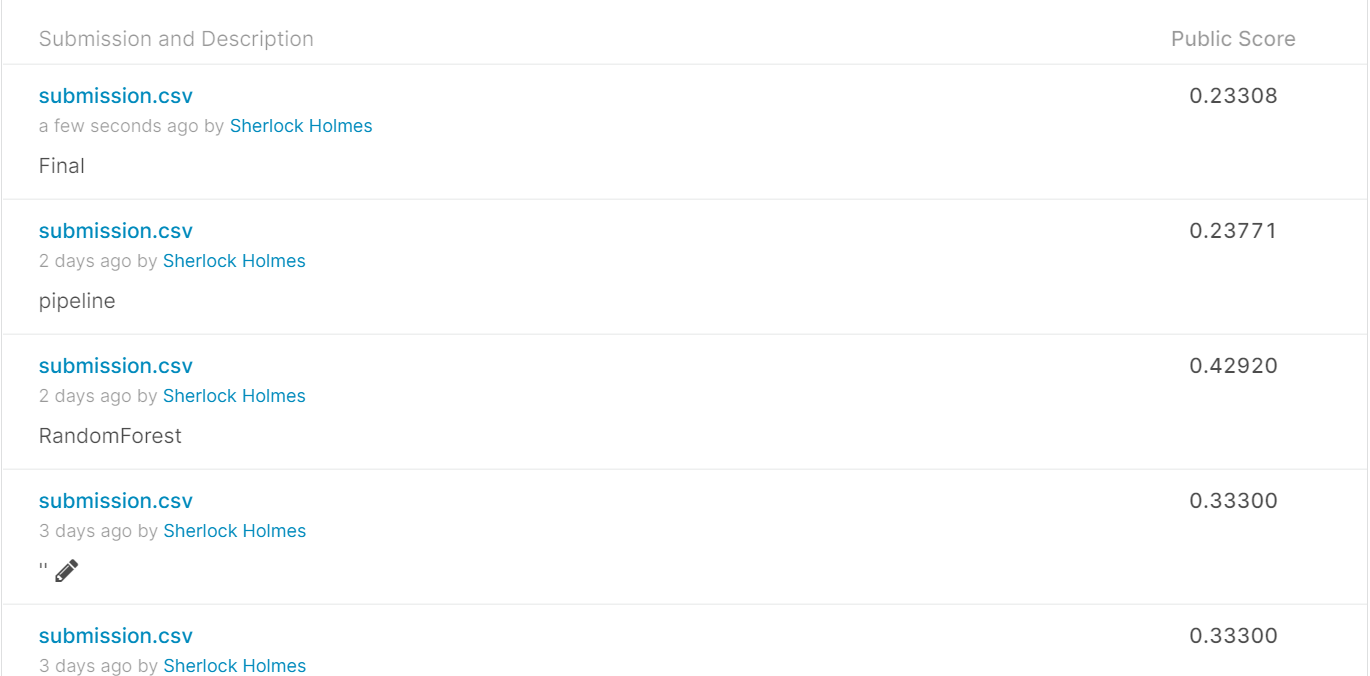

In [30]:
from IPython.display import Image
Image("submit.png")